<a href="https://colab.research.google.com/github/Syandilya/WildLife-Trafficking/blob/main/CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import matthews_corrcoef, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from scipy.stats import mode

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier, StackingClassifier

Importing the Required Datasets.

In [ ]:
train_df = pd.read_csv("/train.csv", index_col='id')
orig_df = pd.read_csv("/secondary_data.csv", sep=";")
test_df = pd.read_csv("/test.csv", index_col='id')

Concatinating train_df and original_df by ignoring the indices of the respective Datasets.

In [ ]:
train_df = pd.concat([train_df, orig_df], ignore_index=True)

Returning the first few rows of the dataset.

In [ ]:
train_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


Returning the first few rows of test_df dataset

In [ ]:
test_df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,
3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
3116946,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
3116947,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


Displaying essential information about dataset's structure and content.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178014 entries, 0 to 3178013
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 509.2+ MB


**pd.DataFrame({}):** Creates an empty Pandas DataFrame to store the calculated results.

**'column':** train_df.columns: Creates a column named 'column' containing the column names of **train_df.**

**'null-count':** train_df.isna().sum().values: Creates a column named 'null-count' containing the total number of null values in each column of train_df.

**train_df.isna():** Checks for null values in each cell, returning a boolean DataFrame.

**.sum():** Calculates the sum of True values (null values) for each column.

**.values:** Converts the result to a NumPy array.

**'% null-count':** np.round(train_df.isna().sum().values*100/len(train_df),6): Creates a column named '% null-count' containing the percentage of null values in each column, rounded to 6 decimal places.

Calculates the percentage of null values by dividing the number of null values by the total number of rows and multiplying by 100.

**np.round()** rounds the result to 6 decimal places.

**.sort_values(by='null-count', ascending=False):** Sorts the DataFrame by the 'null-count' column in descending order.

**.reset_index(drop=True):** Resets the index of the DataFrame, dropping the old index.

In [ ]:
pd.DataFrame({
    'column': train_df.columns,
    'null-count': train_df.isna().sum().values,
    '% null-count': np.round(train_df.isna().sum().values*100/len(train_df),6)
}).sort_values(by='null-count', ascending=False).reset_index(drop=True)

,column,null-count,% null-count
0,veil-type,3015385,94.882685
1,spore-print-color,2904397,91.390315
2,stem-root,2808561,88.374721
3,veil-color,2794603,87.935516
4,stem-surface,2018985,63.529770
5,gill-spacing,1283498,40.386795
6,cap-surface,685143,21.558841
7,gill-attachment,533820,16.797283
8,ring-type,131351,4.133116
9,gill-color,57,0.001794


**train_df.describe():** This part calculates summary statistics for numerical columns in the DataFrame train_df. These statistics typically include count, mean, standard deviation, minimum, quartiles, and maximum values.

**.T:** This transposes the resulting DataFrame, switching rows and columns.

In [ ]:
train_df.describe(include='O').T

,count,unique,top,freq
class,3178014,2,p,1739284
cap-shape,3177974,74,x,1462960
cap-surface,2492871,83,t,468973
cap-color,3178002,78,n,1383760
does-bruise-or-bleed,3178006,26,f,2620222
gill-attachment,2644194,78,a,658732
gill-spacing,1894516,48,c,1355764
gill-color,3177957,63,w,950059
stem-root,369453,38,b,168978
stem-surface,1159029,60,s,333635


In [ ]:
duplicate_rows = train_df[train_df.duplicated()]

# Print the duplicate rows
print(duplicate_rows)

        class  cap-diameter cap-shape cap-surface cap-color  \
3126808     p          1.14         x           g         w   
3129923     p          0.72         x           g         y   
3173471     p          4.27         o           s         n   
3173478     p          4.29         o           t         w   
3173521     p          4.59         o           s         w   
...       ...           ...       ...         ...       ...   
3175182     p          2.94         o           l         g   
3175184     p          3.30         o           l         g   
3175186     p          3.13         o           l         g   
3175187     p          2.83         o           l         g   
3175189     p          3.18         o           l         g   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
3126808                    f               a            d          w   
3129923                    f             NaN          NaN          y   
3173471                    

**train_df.duplicated():**This part checks for duplicate rows in the DataFrame train_df. It returns a boolean Series where True indicates a duplicate row and False indicates a unique row.

**.sum():** This calculates the sum of the boolean values in the Series. Since True is treated as 1 and False as 0, the sum represents the total number of duplicate rows.

In [ ]:
train_df.duplicated().sum()

146

The below line of code effectively removes duplicate rows from the **train_df** DataFrame, modifying the original DataFrame directly. This means that after executing this line, the **train_df** will contain only unique rows.

In [ ]:
train_df.drop_duplicates(inplace=True)

**target**: This is a variable name that is being assigned a value.
**'class'**: This is a string value that represents the target variable. In many machine learning problems, the target variable is the outcome or prediction we want to make.

In [ ]:
target = 'class'

**train_df.drop(target, axis=1):**This part removes the column specified by the target variable from the train_df DataFrame.

The **axis=1** argument indicates that the operation should be performed along the columns (rather than the rows).

**.columns:** This extracts the column names of the resulting DataFrame after dropping the target column.

**.to_list():** This converts the column names from a Pandas Index object to a Python list.

In [ ]:
features = train_df.drop(target, axis=1).columns.to_list()
features

['cap-diameter',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

Below code effectively identifies and stores the names of features in the **train_df** DataFrame that have more than 20% null values. The resulting list **features_with_high_null_values** will contain the names of these features.

In [ ]:
features_with_high_null_values = [feature for feature in features if (train_df[feature].isna().sum()/len(train_df)*100)>20]
features_with_high_null_values

['cap-surface',
 'gill-spacing',
 'stem-root',
 'stem-surface',
 'veil-type',
 'veil-color',
 'spore-print-color']

**train_df[features]:** This part selects only the columns specified in the features list from the train_df DataFrame.

**.select_dtypes(include='object'):** This filters the selected columns based on their data type, keeping only those columns that have an object data type (typically indicating categorical or string data).

**.columns:** Extracts the column names of the remaining columns after filtering.

**.to_list():** Converts the column names from a Pandas Index object to a Python list.

In [ ]:
categorical_features = train_df[features].select_dtypes(include='object').columns.to_list()
categorical_features

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

**set(features):** Creates a set of all feature names from the features list. A set is an unordered collection of unique elements.

**set(categorical_features):** Creates a set of all categorical feature names from the categorical_features list.

**set(features) - set(categorical_features):** Performs set subtraction, removing the elements in the categorical_features set from the features set. This results in a set containing only the unique feature names that are not categorical.

**list(...):** Converts the resulting set back into a list.

This code effectively identifies and stores the names of numerical features in the **train_df** DataFrame. The resulting list **numerical_features** will contain the names of columns that have numerical data types (e.g., int, float).

In [ ]:
numerical_features = list(set(features) - set(categorical_features))
numerical_features

['stem-width', 'cap-diameter', 'stem-height']

**pd.concat([train_df, test_df]):**

Concatenates the train_df and test_df DataFrames vertically, combining their rows.

**[categorical_features]:**

Selects only the columns specified in the categorical_features list from the concatenated DataFrame.

**.describe(include='O'):**

Calculates summary statistics for the selected categorical features. The include='O' argument ensures that only object-type columns (typically categorical) are included.

**.T:**

Transposes the resulting DataFrame, switching rows and columns for a more readable format.

**Working**

This code provides a concise summary of categorical features from both the train_df and test_df DataFrames. It calculates the following statistics for each categorical feature:

**count:** The total number of non-null values.

**unique:** The number of unique values.

**top:** The most frequent value.

**freq:** The frequency of the most frequent value.

In [ ]:
pd.concat([train_df, test_df])[categorical_features].describe(include='O').T

,count,unique,top,freq
cap-shape,5255761,108,x,2420907
cap-surface,4123785,114,t,775813
cap-color,5255807,109,n,2288054
does-bruise-or-bleed,5255814,29,f,4333738
gill-attachment,4372220,117,a,1089691
gill-spacing,3132740,66,c,2242712
gill-color,5255726,86,w,1570803
stem-root,609261,45,b,279559
stem-surface,1915361,87,s,552131
stem-color,5255773,88,w,2016928


# Distribution of Categorical Features

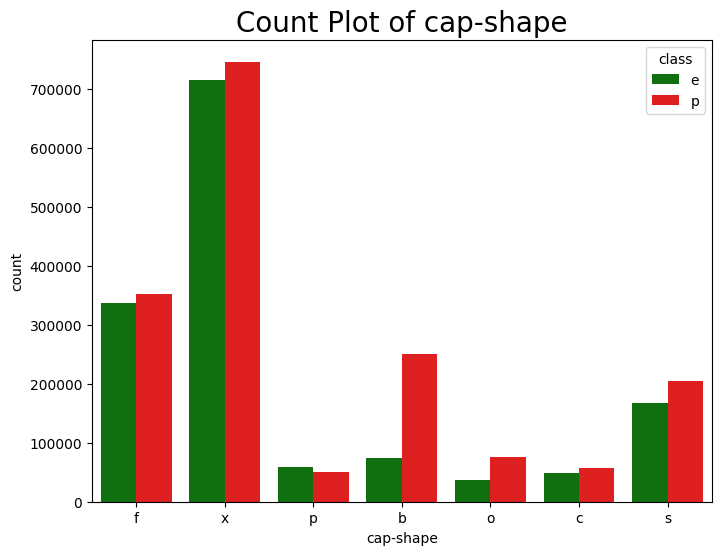

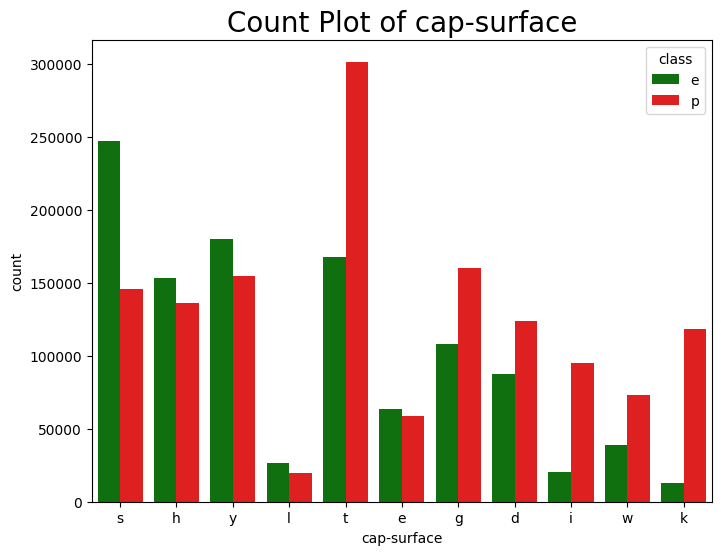

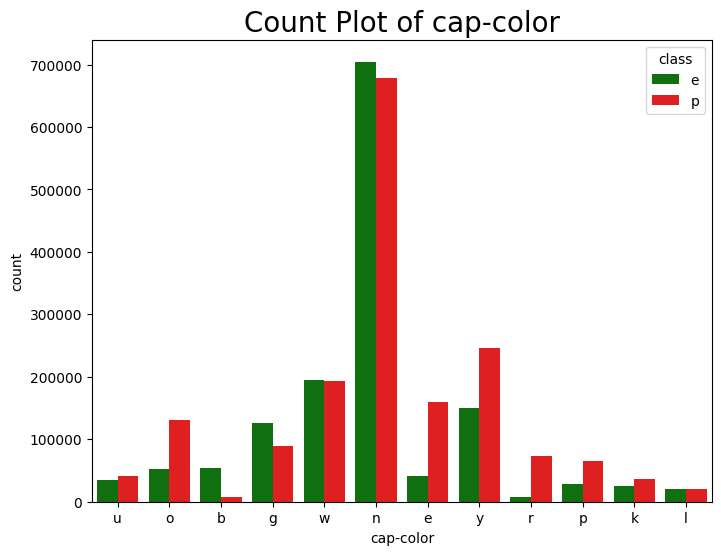

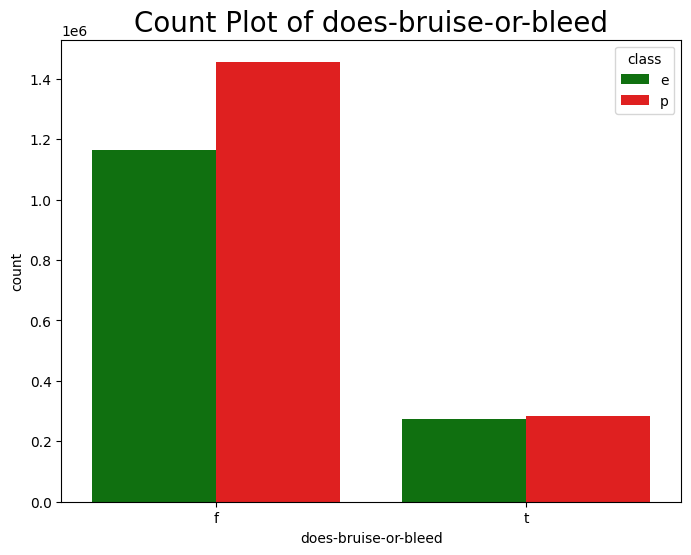

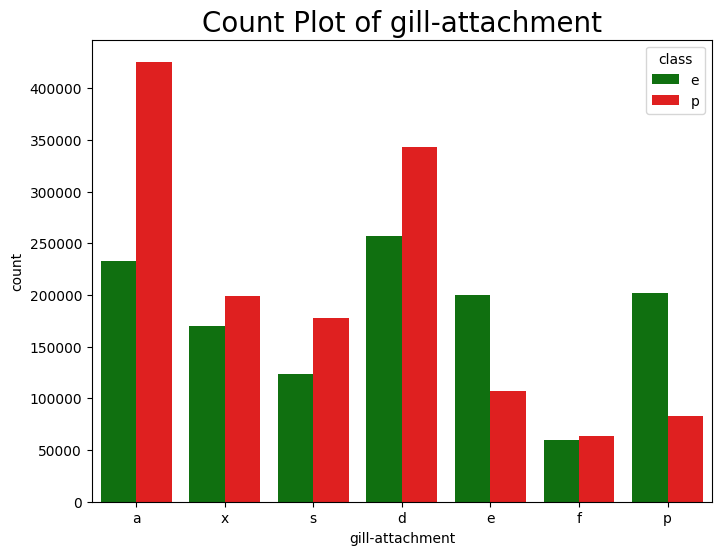

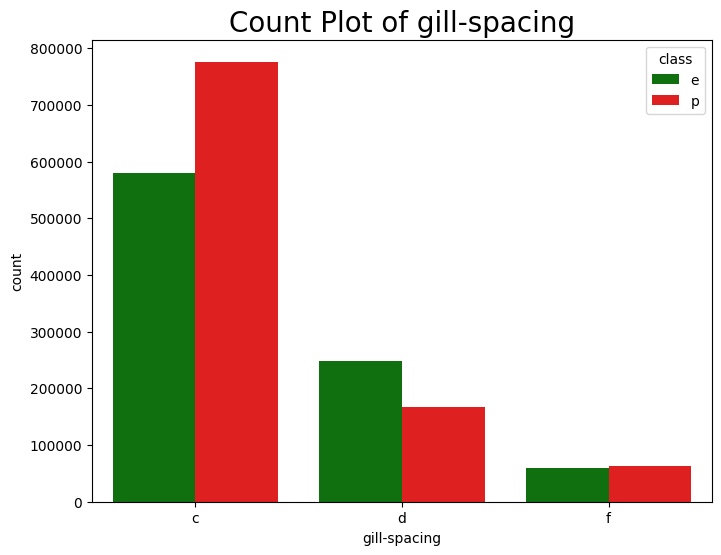

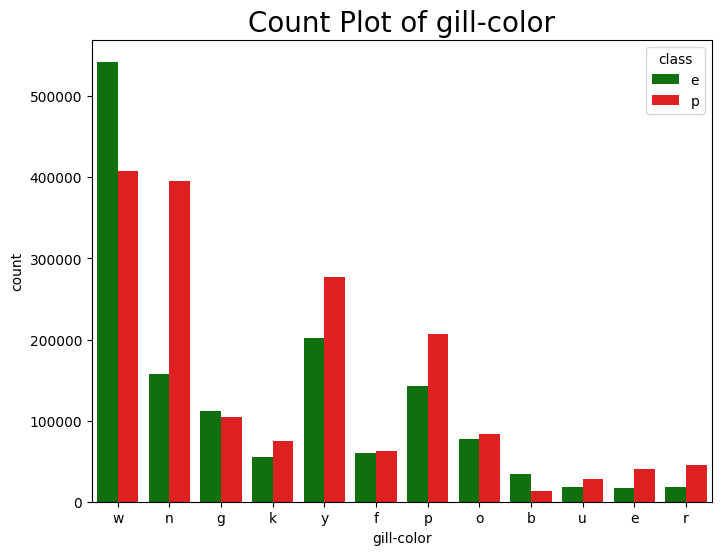

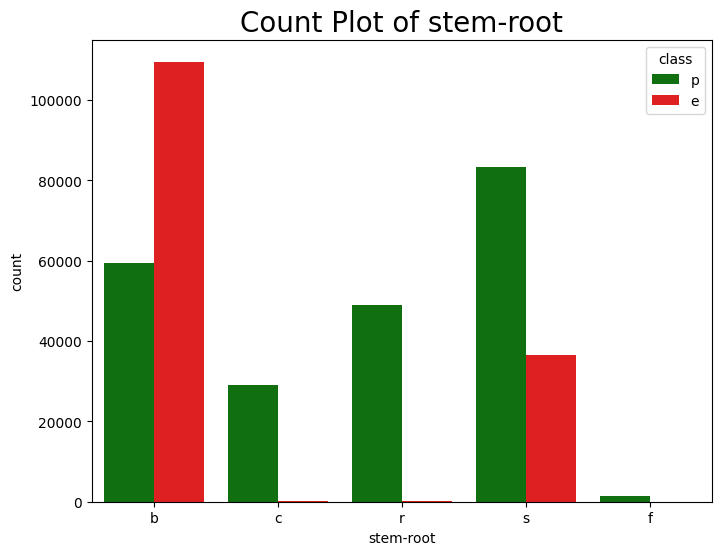

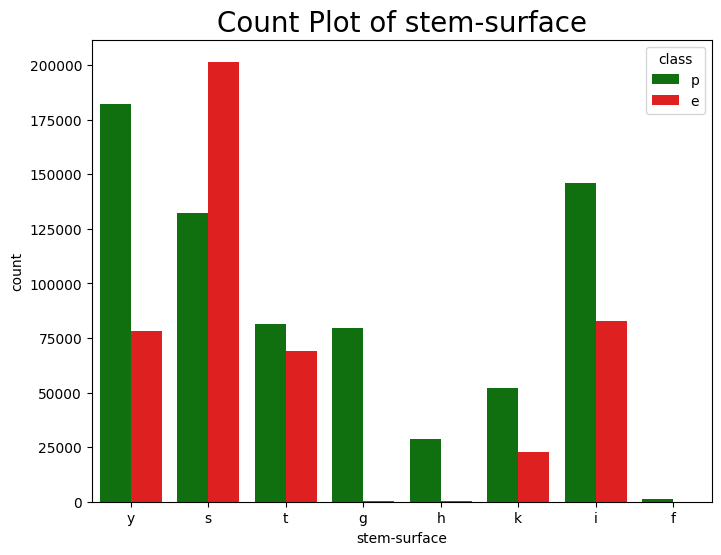

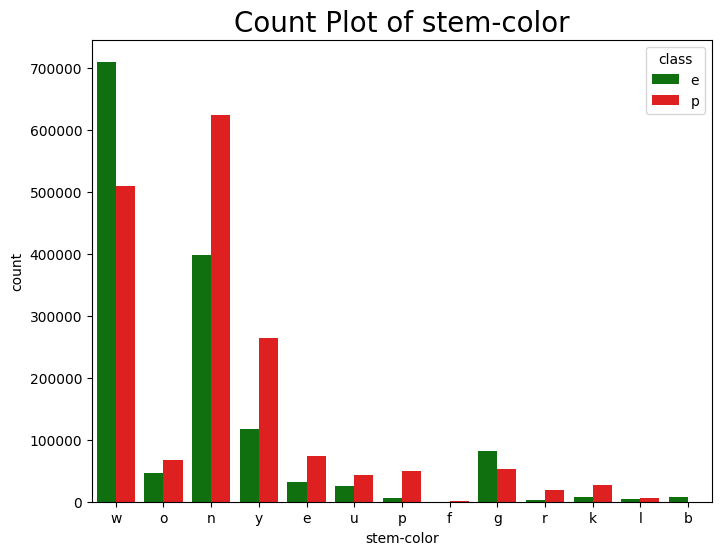

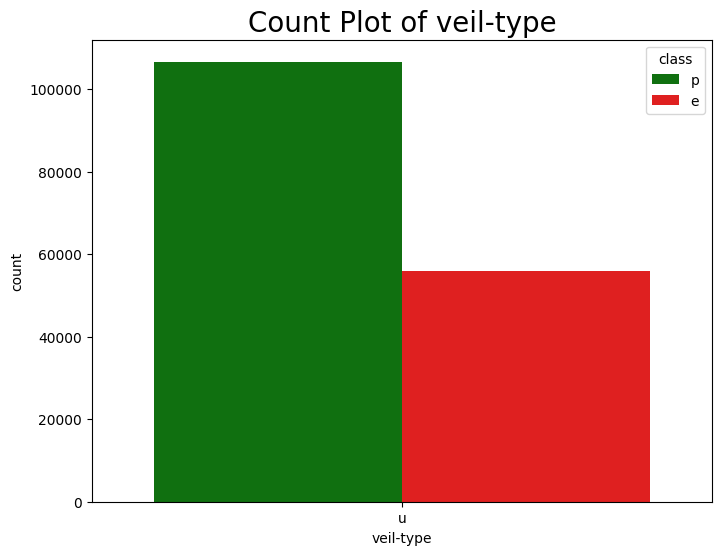

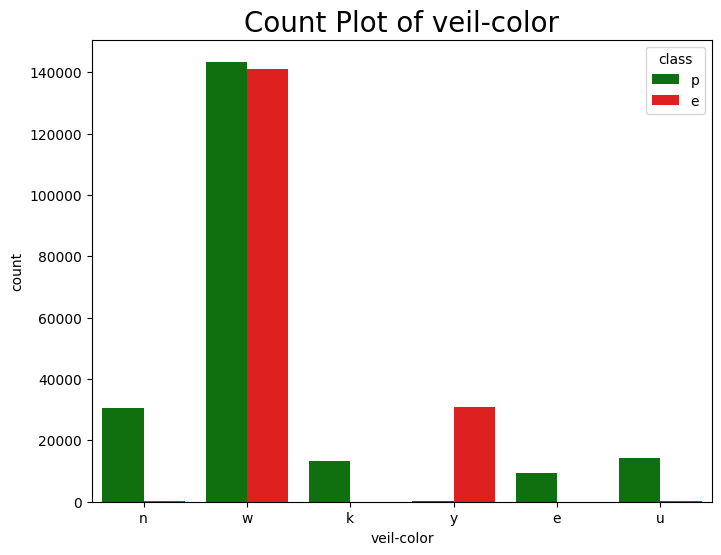

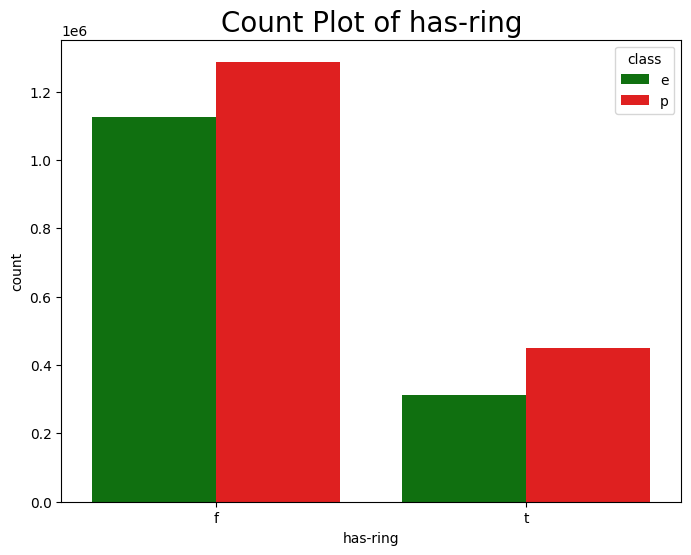

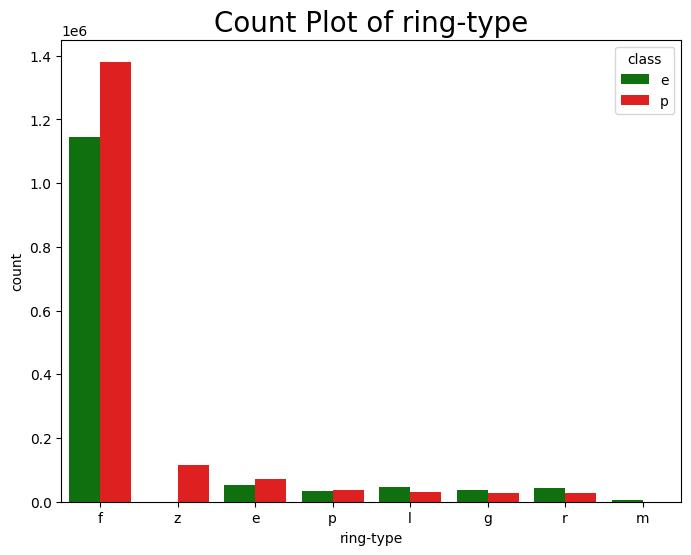

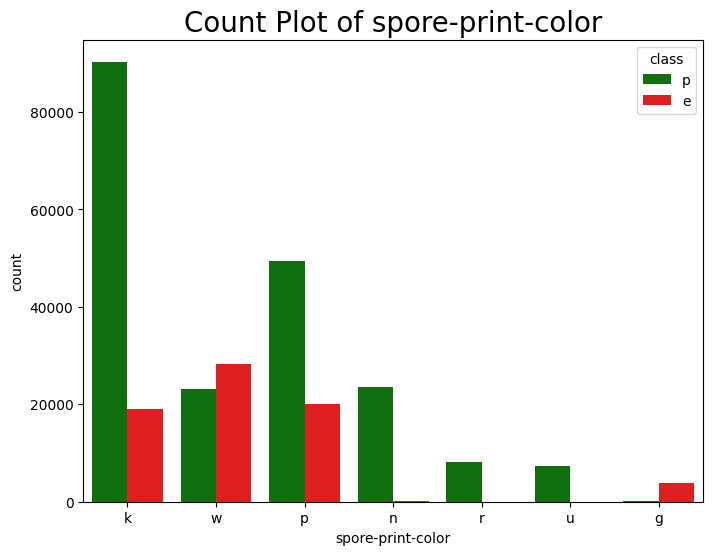

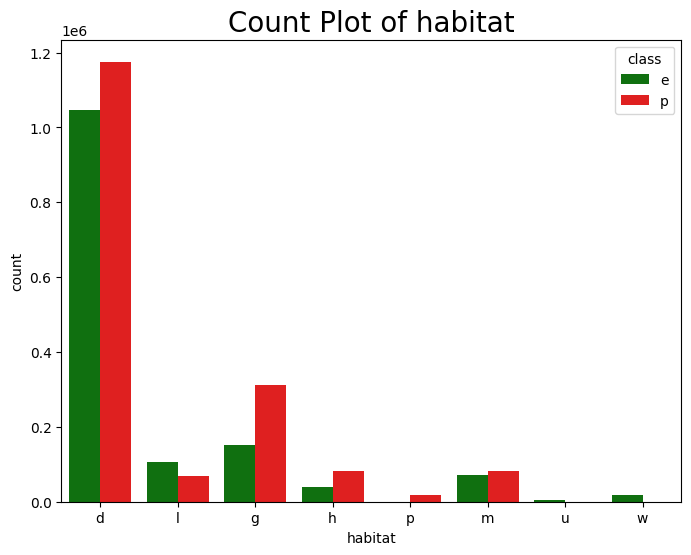

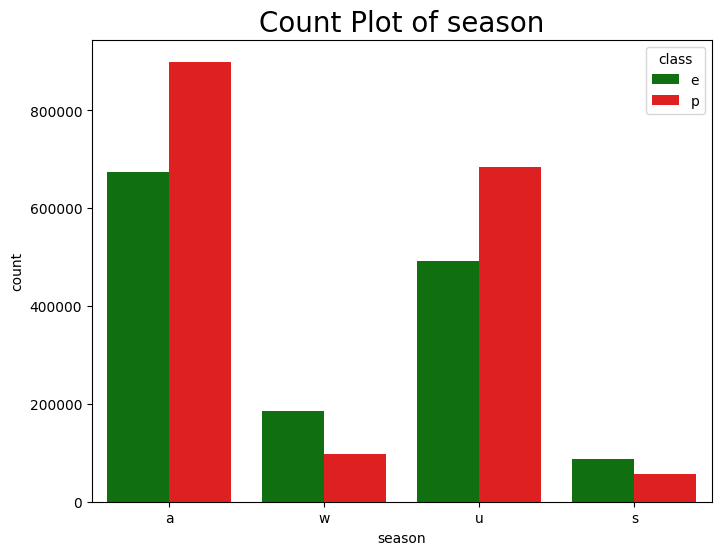

In [ ]:

for i, col in enumerate(categorical_features):
    plt.figure(figsize=(8, 6))

    # Filter data for categories with frequency >= 100
    fil_data = train_df[col].value_counts()
    fil_cat = fil_data[fil_data >= 100].index
    fil_df = train_df[train_df[col].isin(fil_cat)]

    # Define custom colors for each target class
    palette = ['green', 'red']  # Customize these colors as needed

    # Create the count plot with custom colors
    sns.countplot(x=col, hue=target, data=fil_df, palette=palette)

    plt.title(f"Count Plot of {col}", size=20)
    plt.show()

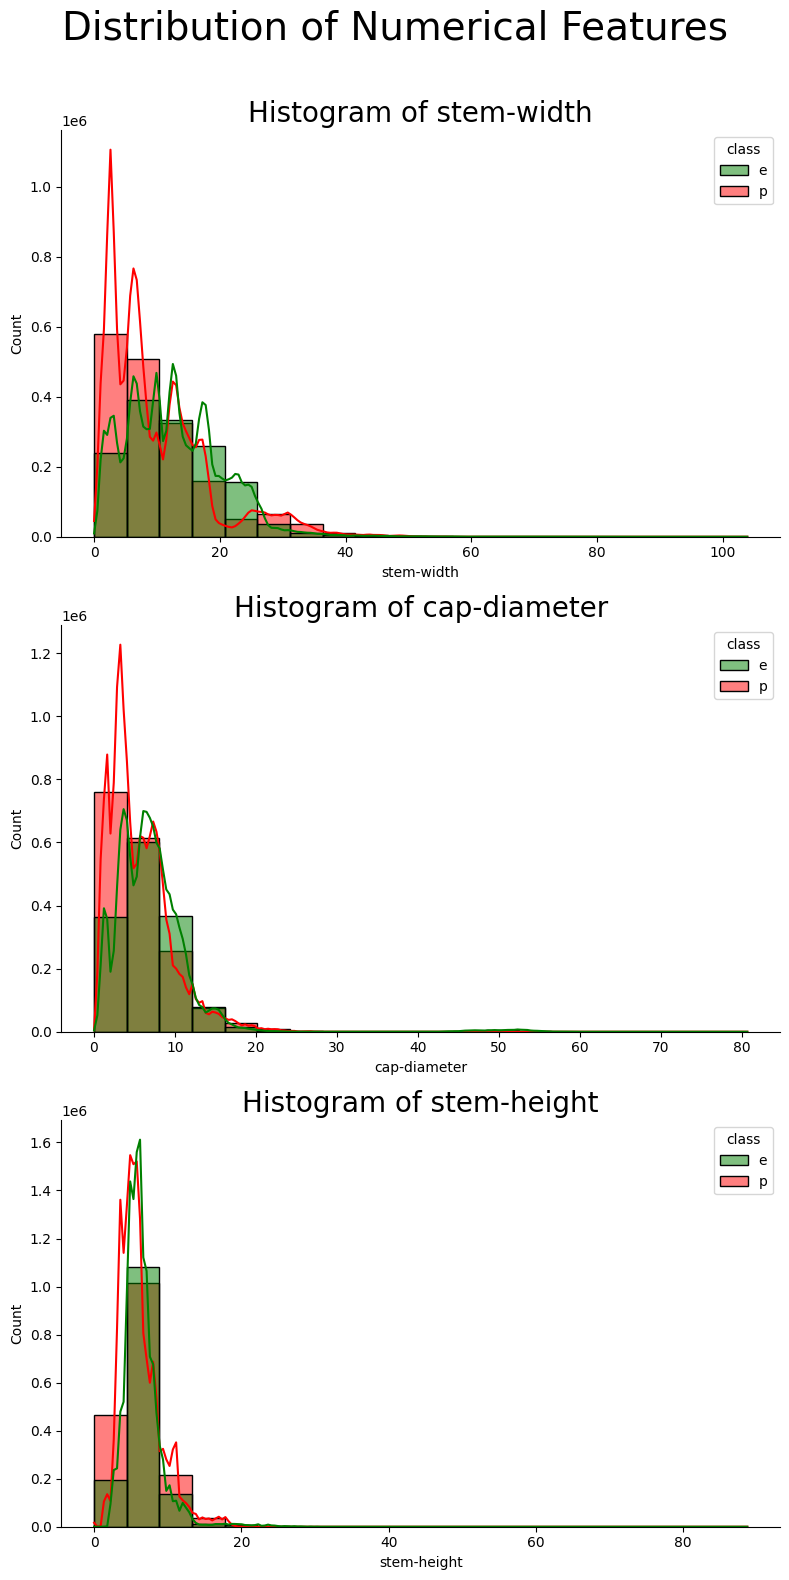

In [ ]:
palette = ['green', 'red']  # Customize these colors as needed

plt.figure(figsize=(8, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 1, i+1)

    # Use the custom palette in sns.histplot
    sns.histplot(x=col, hue=target, data=train_df, kde=True, bins=20, palette=palette)

    plt.title(f"Histogram of {col}", size=20)
    sns.despine()
plt.tight_layout()
plt.suptitle("Distribution of Numerical Features", y=1.05, size=28)
plt.show()

# BOX PLOTS

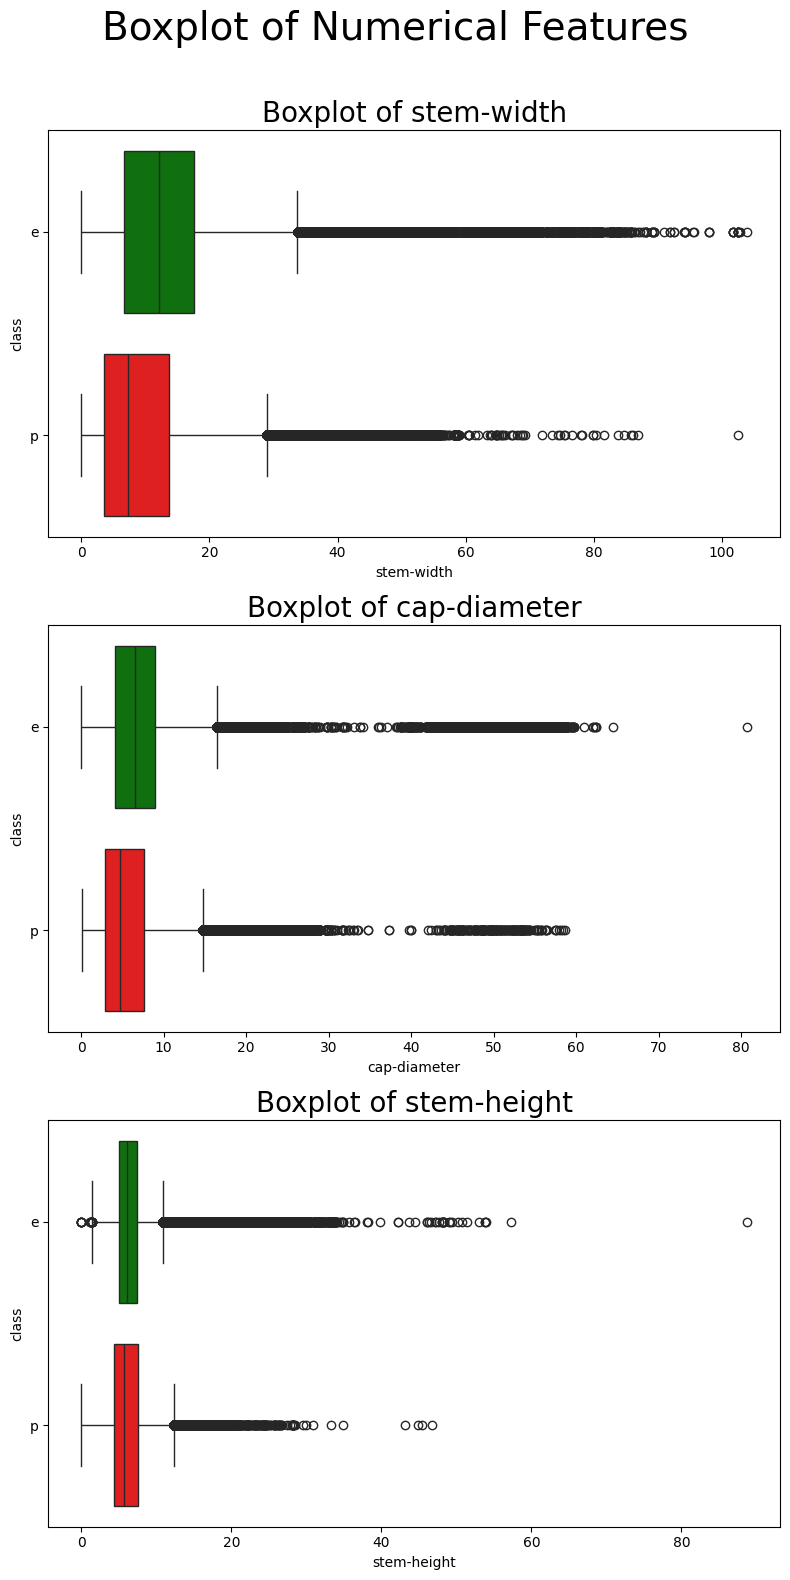

In [ ]:
palette = ['green', 'red']  # Customize these colors as needed

plt.figure(figsize=(8, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 1, i+1)

    # Use the custom palette in sns.boxplot
    sns.boxplot(x=col, y=target, hue=target, data=train_df, palette=palette)

    plt.title(f"Boxplot of {col}", size=20)
plt.tight_layout()
plt.suptitle("Boxplot of Numerical Features", y=1.05, size=28)
plt.show()

Violin Plots


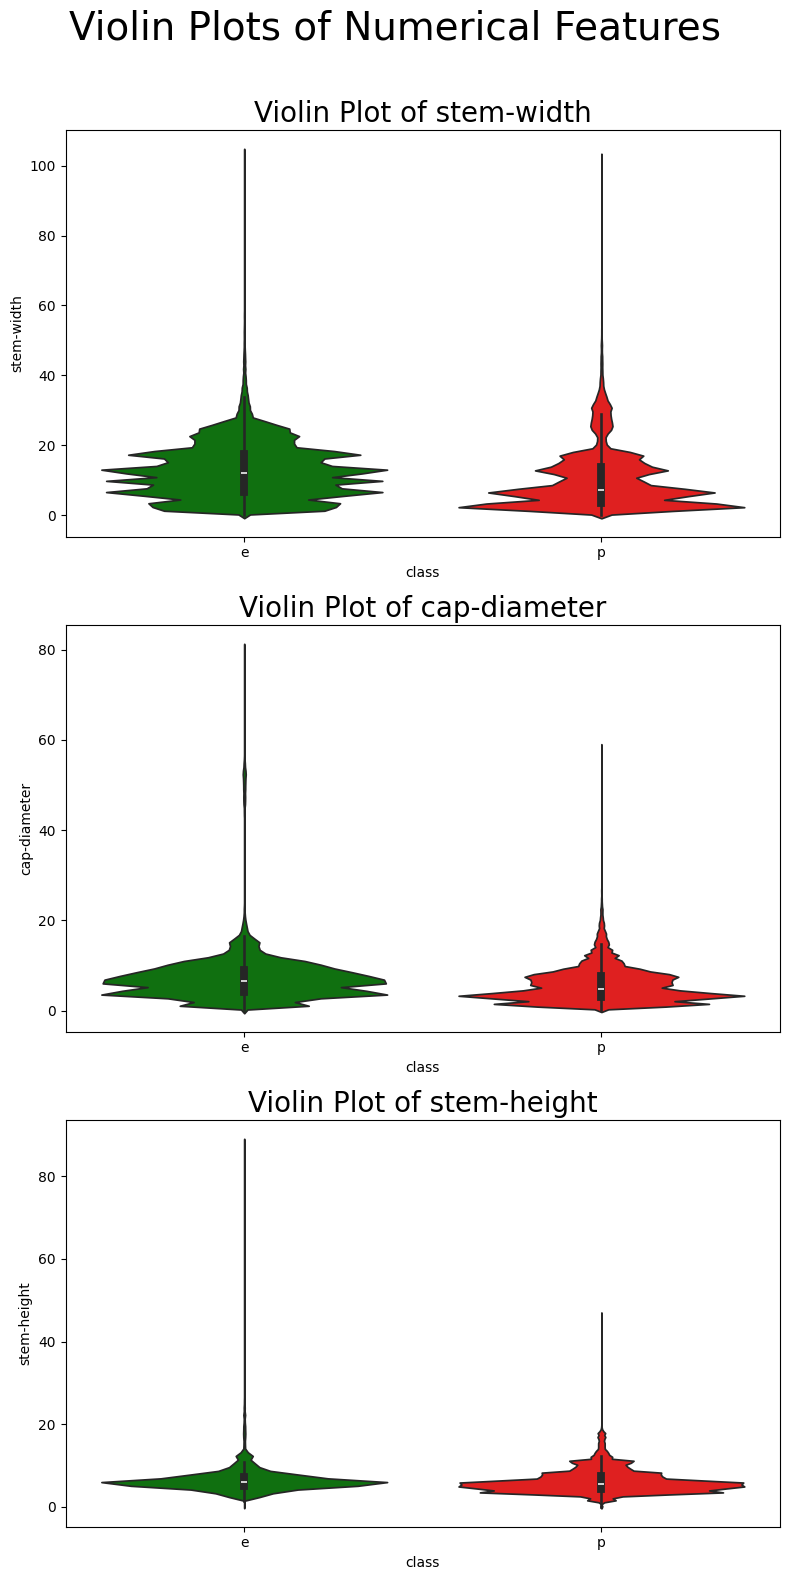

In [ ]:
palette = ['green', 'red']  # Customize these colors as needed

plt.figure(figsize=(8, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 1, i+1)

    # Use the custom palette in sns.violinplot
    sns.violinplot(x=target, y=col, hue=target, data=train_df, palette=palette)

    plt.title(f"Violin Plot of {col}", size=20)
plt.tight_layout()
plt.suptitle("Violin Plots of Numerical Features", y=1.05, size=28)
plt.show()

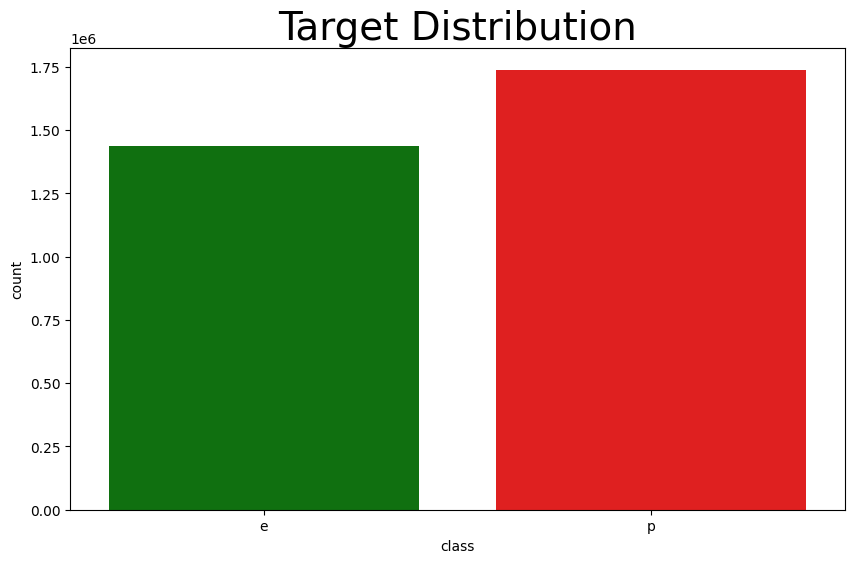

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=target, data=train_df, palette=['green', 'red'])
plt.title("Target Distribution", size=28)
plt.show()